# Title: Activity Recognition from a Single Chest-Mounted Accelerometer

<a href="https://ibb.co/n7vjQzX"><img src="https://i.ibb.co/GWLRCcZ/Acc.jpg" alt="Acc" border="0" /></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
working_folder = '/content/drive/My Drive/Colab Notebooks/SFL'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from time import time
import warnings 
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
df_tot = []
for num in range(1,16):
    tmp =  pd.read_csv(f'{working_folder}/{num}.csv', index_col=0, header=None, 
                       names=['x', 'y', 'z', 'label'])
    tmp['participant'] = num

    """ To ensure different devices provide a similar output under similar 
    conditions for differnt participants, we need to calibrate the 
    acceleration signals, and also add low pass a high pass filtering to x,y and z
    components of acceleration signla"""

    # for col_name in ['x', 'y', 'z']:  # filtering outliers and noise in all x,y,z axis!
        # low, high = tmp[col_name].quantile(q=[0.00001, 0.999])
        # tmp[col_name][tmp[col_name] > high] = high
        # tmp[col_name][tmp[col_name] < low] = low
        # print(f"the low in {col_name} is {low}")

    # tmp[['x', 'y', 'z']] = tmp[['x', 'y', 'z']].apply(lambda x: (x - x.min(axis=0)))
    # tmp[['label', 'participant']] = tmp[['label', 'participant']].astype('category')


    df_tot.append(tmp)
df = pd.concat(df_tot)

del tmp, df_tot
print(f'The shape of the DataFrame is: {df.shape[0]} rows and {df.shape[1]} columns')
print('-'*60)
df.info()

The shape of the DataFrame is: 1926896 rows and 5 columns
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Float64Index: 1926896 entries, 0.0 to 103500.0
Data columns (total 5 columns):
x              int64
y              int64
z              int64
label          int64
participant    int64
dtypes: int64(5)
memory usage: 88.2 MB


In [0]:
import matplotlib as mpl
# COLOR = 'white'
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR
# mpl.rcParams['axes.facecolor'] ='#000000'


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

mpl.rc('font', **font)

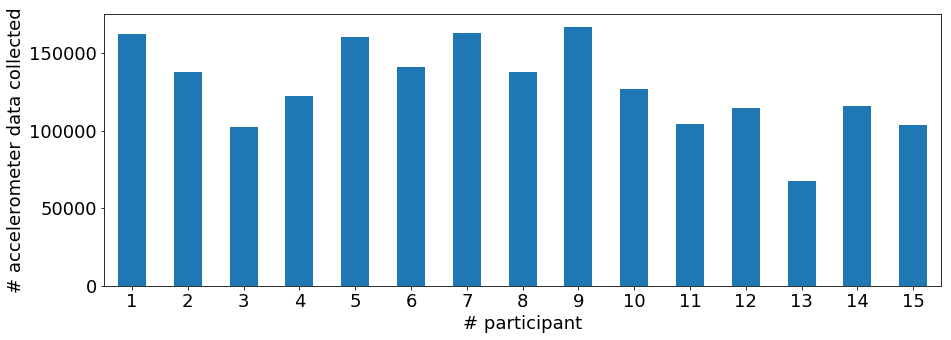

In [4]:
# to check if enough data is collected for different participants! 
plt.figure(figsize=(15,5))

_ = df.participant.value_counts(sort=False).plot.bar(rot=0)
_ = plt.xlabel('# participant')
_ = plt.ylabel('# accelerometer data collected')

### Labels are codified by numbers<br>
   --- 1: Working at Computer<br>
   --- 2: Standing Up, Walking and Going up\down stairs<br>
   --- 3: Standing<br>
   --- 4: Walking<br>
   --- 5: Going Up\Down Stairs<br>
   --- 6: Walking and Talking with Someone<br>
   --- 7: Talking while Standing<br>

+-------------+---------------+
|   #activity |   #percentage |
|-------------+---------------|
|           0 |      0.193005 |
|           1 |     31.588    |
|           2 |      2.48472  |
|           3 |     11.248    |
|           4 |     18.5305   |
|           5 |      2.67259  |
|           6 |      2.47912  |
|           7 |     30.8041   |
+-------------+---------------+


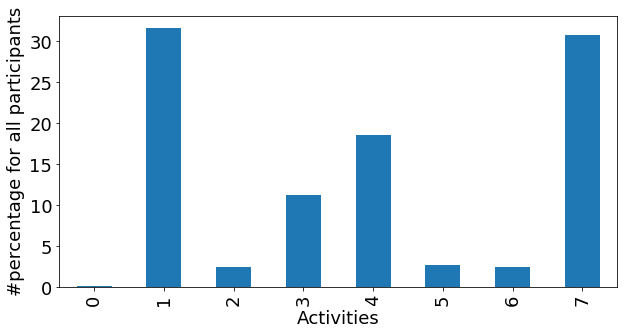

In [5]:
# percentages of each activity! 
plt.figure(figsize=(10,5))
(df.label.value_counts(sort=None)*100/df.shape[0]).plot.bar()
plt.xlabel('Activities')
plt.ylabel('#percentage for all participants')

ab = pd.DataFrame(data=df.label.value_counts(sort=None)*100/df.shape[0])
ab.index.name = '#activity'
ab.columns = ['#percentage']


from tabulate import tabulate
print(tabulate(ab, headers='keys', tablefmt='psql'))

### So we have unbalance classes, which should be taken care of!

## Now let's check the distribution of classed for differnet participants:

In [0]:
# there is 0.1% activity recorded az zero! It is safe to drop these records.
df = df.drop(df[df.label ==0].index)

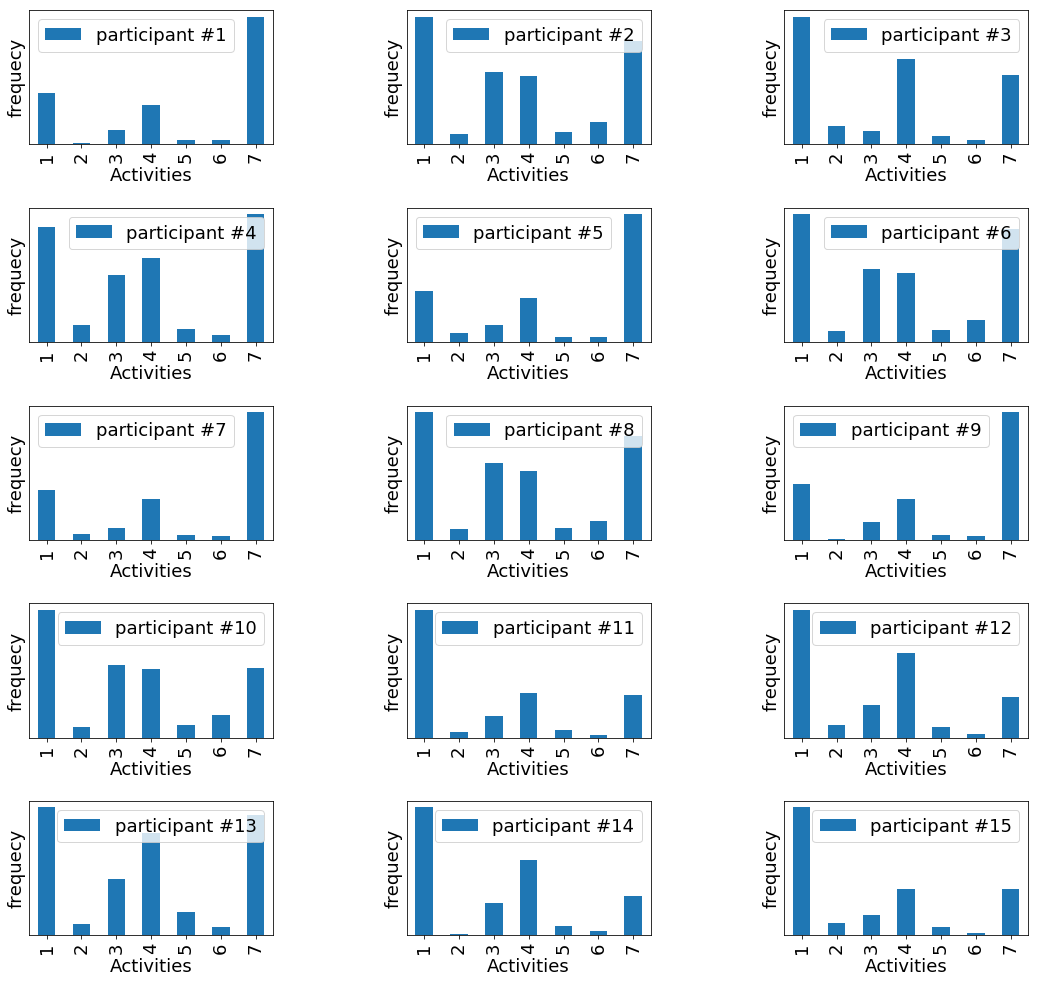

In [7]:
plt.subplots(5,3, figsize=(16,14))
plt.title('distribution of activities for different participants')
for index in range(1,16):
    plt.subplot(5,3,index)
    df.groupby('participant').label.value_counts(sort=None)[index].plot.bar(label=f'participant #{index}')
    plt.xlabel('Activities')
    plt.ylabel('frequecy')
    plt.yticks([])
    plt.tight_layout()
    plt.legend()

In [0]:
# Vector magnitude processing
# Euclidean norm of the acceleration in x/y/z axes

# df = df.assign(dx=df.x.diff(), dy=df.y.diff(), dz=df.z.diff())
# df['R'] = np.sqrt(df.dx**2+df.dy**2+df.dz**2)
df['R'] = np.sqrt(df.x**2+df.y**2+df.z**2)

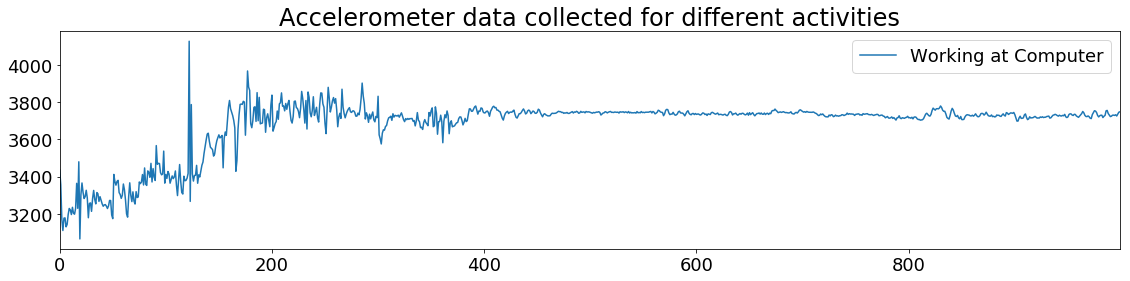

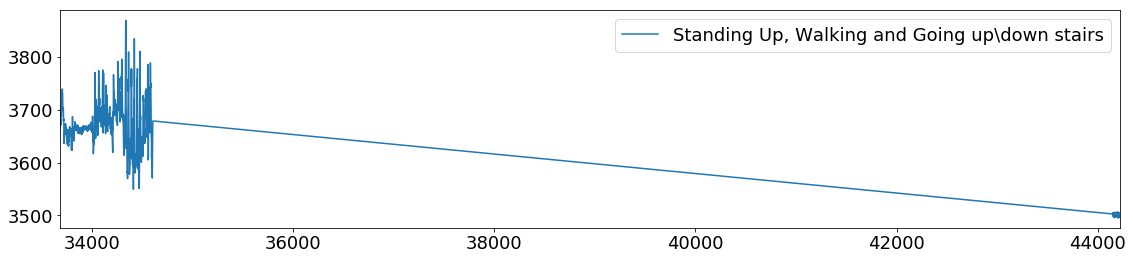

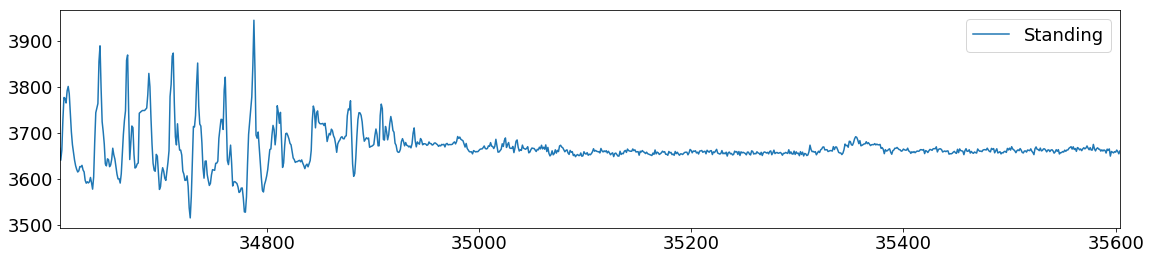

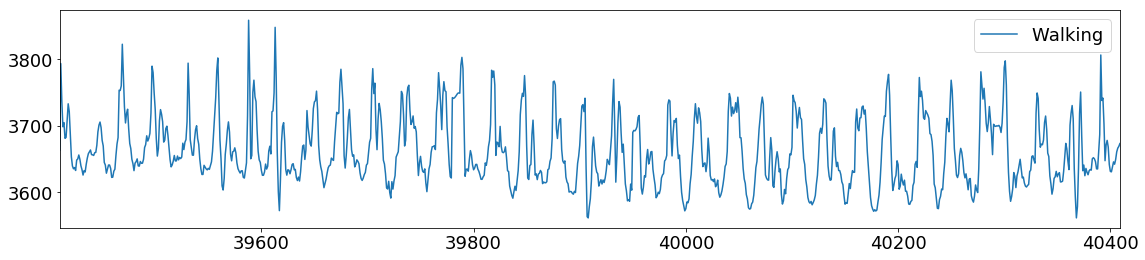

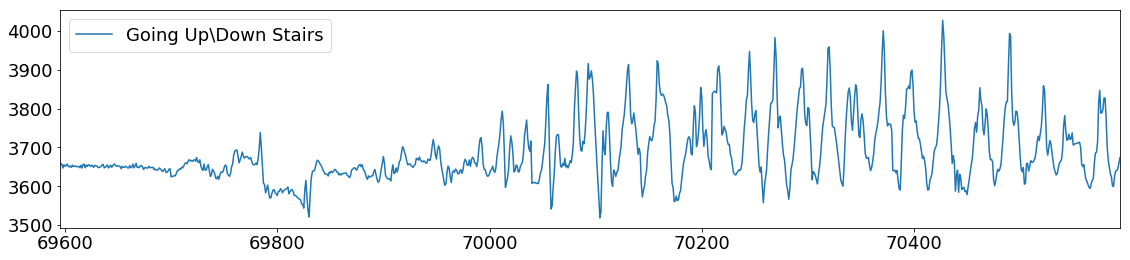

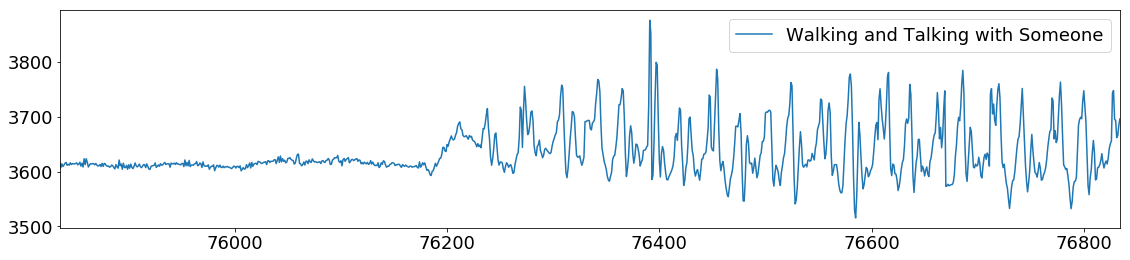

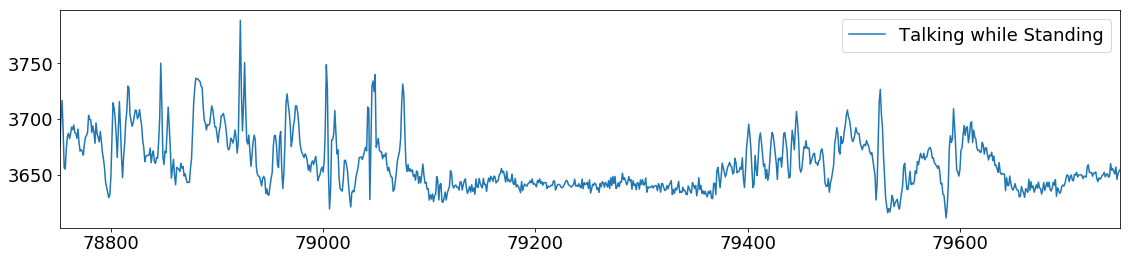

In [9]:
fig, ax1 = plt.subplots(figsize=(19,4))
plt.title('Accelerometer data collected for different activities', fontsize=24)
df[df.label == 1].iloc[:1000,:].plot(y='R', ax=ax1, label='Working at Computer')

fig, ax1 = plt.subplots(figsize=(19,4))
df[df.label == 2].iloc[:1000,:].plot(y='R', ax=ax1, label='Standing Up, Walking and Going up\down stairs')

fig, ax1 = plt.subplots(figsize=(19,4))
df[df.label == 3].iloc[:1000,:].plot(y='R', ax=ax1, label='Standing')

fig, ax1 = plt.subplots(figsize=(19,4))
df[df.label == 4].iloc[:1000,:].plot(y='R', ax=ax1, label='Walking')

fig, ax1 = plt.subplots(figsize=(19,4))
df[df.label == 5].iloc[:1000,:].plot(y='R', ax=ax1, label='Going Up\Down Stairs')

fig, ax1 = plt.subplots(figsize=(19,4))
df[df.label == 6].iloc[:1000,:].plot(y='R', ax=ax1, label='Walking and Talking with Someone')

fig, ax1 = plt.subplots(figsize=(19,4))
_ = df[df.label == 7].iloc[:1000,:].plot(y='R', ax=ax1, label='Talking while Standing')

# Plot for the individual axis

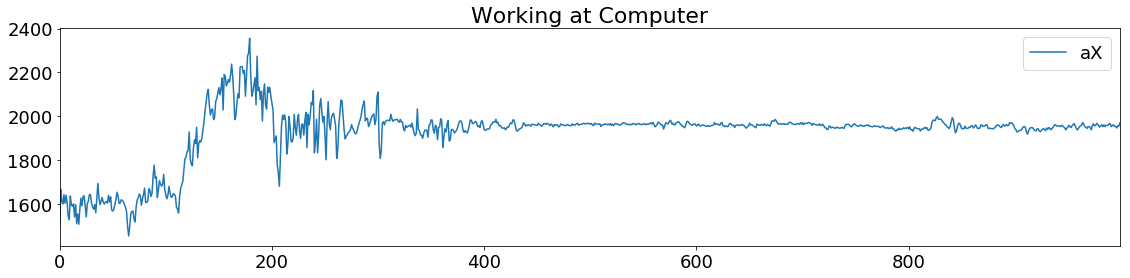

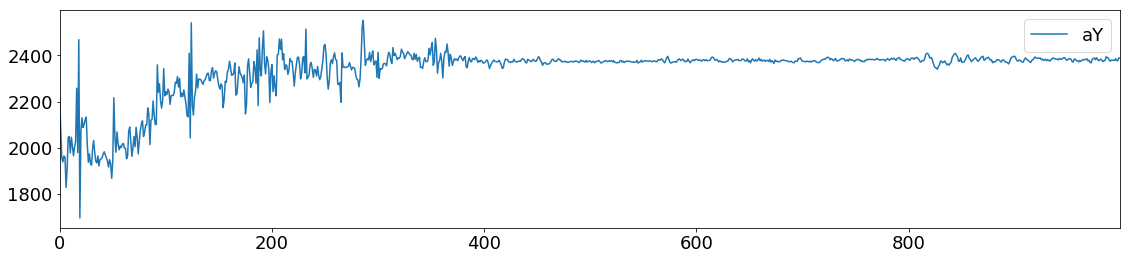

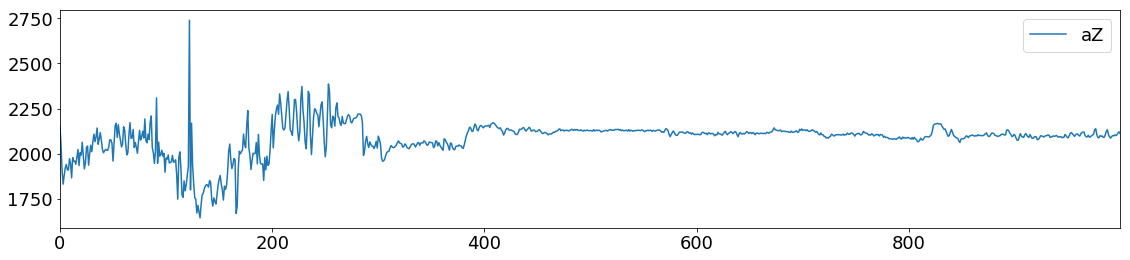

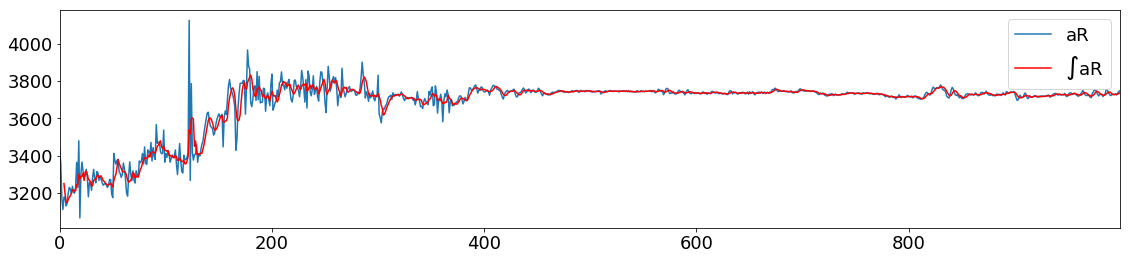

In [10]:
fig, ax1 = plt.subplots(figsize=(19,4))
plt.title('Working at Computer', fontsize=22)

# df[df.label == 1].iloc[:1000,:].plot(y='dz', ax=ax1, label='dz')
df[df.label == 1].iloc[:1000,:].plot(y='x', ax=ax1, label='aX')

fig, ax1 = plt.subplots(figsize=(19,4))
_ = df[df.label == 1].iloc[:1000,:].plot(y='y', ax=ax1, label='aY')


fig, ax1 = plt.subplots(figsize=(19,4))
df[df.label == 1].iloc[:1000,:].plot(y='z', ax=ax1, label='aZ')


fig, ax1 = plt.subplots(figsize=(19,4))
_ = df[df.label == 1].iloc[:1000,:].plot(y='R', ax=ax1, label='aR')
_ = df[df.label == 1].iloc[:1000,:].rolling(5).mean().plot(y='R', ax=ax1, label=r'$\int $aR', color='r')



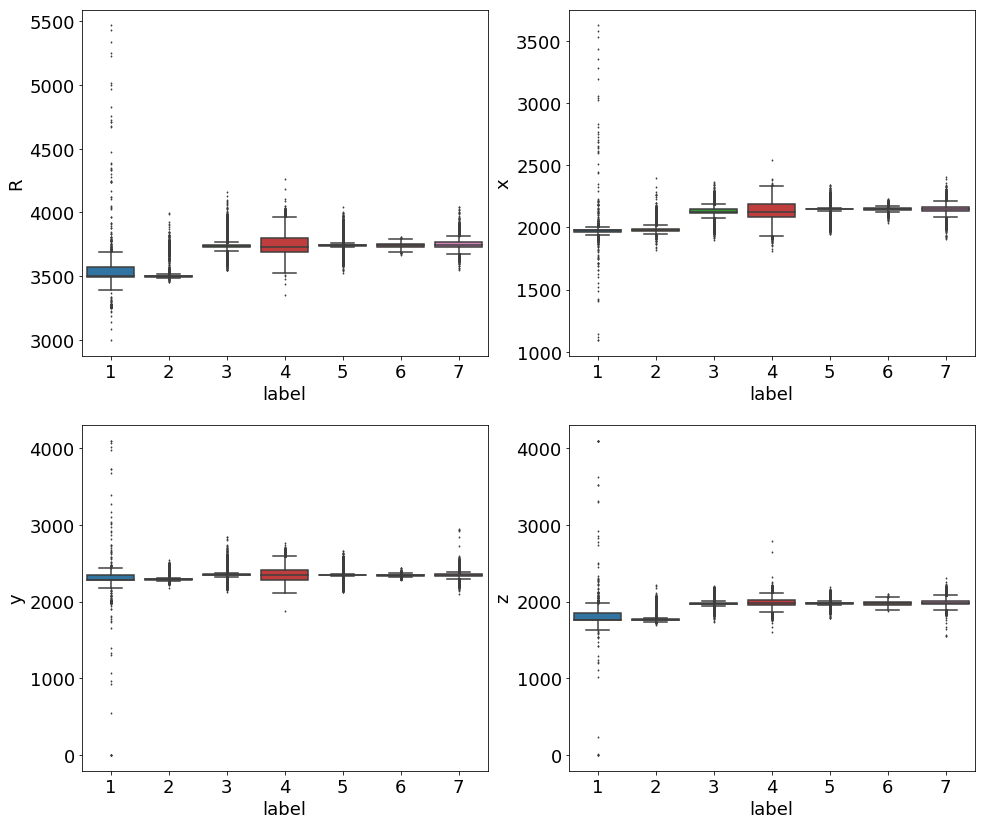

In [11]:
import seaborn as sns
# plt.subplots(221)
plt.subplots(2,2, figsize=(16,14))

plt.subplot(2,2,1)
sns.boxplot(x="label", y="R", data=df[df.participant==2], fliersize=1)
# plt.ylim([0, 100])


plt.subplot(2,2,2)
sns.boxplot(x="label", y="x", data=df[df.participant==2], fliersize=1)
# plt.ylim([1800, 2000])


plt.subplot(2,2,3)
sns.boxplot(x="label", y="y", data=df[df.participant==2], fliersize=1)
# plt.ylim([2300, 2500])


plt.subplot(2,2,4)
sns.boxplot(x="label", y="z", data=df[df.participant==2], fliersize=1)
# plt.ylim([1900, 2200])


plt.show()

## This shows we also need feature extraction for individual axis i.e., x,y and z.

Features include vector magniture, it’s mean, standard deviation, coefficient of variation,<br>
median, min, max, 25th & 75th percentiles, mean amplitude deviation, mean power<br>
deviation, kurtosis & skew

In [12]:
# For mean amplitude deviation!

# Using raw acceleration data to assess the intensity of physical activity enables 
# direct comparisons between studies using different accelerometer brands. Mean amplitude
# deviation (MAD in mg) calculated from resultant tri-axial raw acceleration signal was
# recently shown to perform best in classifying the intensity of physical activity in adults
# irrespective of the accelerometer brand. This study compared MAD values and cut-points 
# between two different accelerometers in adolescents

# https://www.ncbi.nlm.nih.gov/pubmed/26251724  
# Mean amplitude deviation calculated from raw acceleration data: A novel method for classifying
# the intensity of adolescents' physical activity irrespective of accelerometer brand


# computes the median over the absolute deviations from the median. It is a measure of dispersion
# similar to the standard deviation, but is more robust to outliers

from scipy.stats import median_absolute_deviation

def feature_extraction(df, time_window):
    new_df = df.copy() # create a new dataframe that the real data are not touched!
    # new_df = new_df.assign(dx=new_df.x.diff(), dy=new_df.y.diff(), dz=new_df.z.diff())
    # df['R'] = np.sqrt(new_df.x**2+new_df.y**2+new_df.z**2)
    # df['R'] = np.sqrt(new_df.dx**2+new_df.dy**2+new_df.dz**2)
    # new_df['Rdiff'] = np.sqrt(new_df.dx**2+new_df.dy**2+new_df.dz**2) # TO DO: fix this!
    # new_df['R'] = df['R']
    new_df['R'] = np.sqrt(new_df.x**2+new_df.y**2+new_df.z**2)
    new_df['mean'] = df.R.rolling(time_window).mean()
    new_df['std'] = df.R.rolling(time_window).std()
    #Coeficient of variance!
    new_df['cv'] = new_df.apply(lambda x: (x['std'] / x['mean'])*100 , axis=1, raw=True) 
    new_df['median'] = df.R.rolling(time_window).median()
    new_df['min'] = df.R.rolling(time_window).min()
    new_df['max'] = df.R.rolling(time_window).max()
    new_df['25th_percentiles'] = df.R.rolling(time_window).quantile(.25)
    new_df['75th_percentiles'] = df.R.rolling(time_window).quantile(.75)
    #Median amplitude deviation
    new_df['MAD'] = df.R.rolling(time_window).apply(lambda x: median_absolute_deviation(x), raw=True)
    new_df['kurtosis']= df.R.rolling(time_window).kurt()
    new_df['skewness']= df.R.rolling(time_window).skew()

    # Features for each individual axis of movement
    df_axis_list = []
    
    # for axis in ['dx', 'dy', 'dz', 'x', 'y', 'z']:
    for axis in ['x', 'y', 'z']:

        df_axis = pd.DataFrame(index=df.index)
        df_axis['mean'] = df[axis].rolling(time_window).mean()
        df_axis['std']  = df[axis].rolling(time_window).std()
        df_axis['range']= df[axis].rolling(time_window).apply(lambda x: x.max() - x.min(), raw=True) # check this
        df_axis['variance']  = df[axis].rolling(time_window).var()
        df_axis['25th_percentiles'] = df[axis].rolling(time_window).quantile(.25)
        df_axis['75th_percentiles'] = df[axis].rolling(time_window).quantile(.75)
    
        df_axis.rename(columns=lambda x: str(x)+'_'+str(axis), inplace=True)
        df_axis_list.append(df_axis)
    
    df_all_axis = pd.concat(df_axis_list, axis=1)
    new_df = pd.concat([new_df, df_all_axis], axis=1)
    
    del df_all_axis, df_axis_list
        
    return new_df

start_time = time()
df_features = feature_extraction(df, 156)

print(f"Feature extraction takes ~{(time() - start_time)/60:.0f} minutes!")

Feature extraction takes ~5 minutes!


In [13]:
print(tabulate(df_features.sample(20), headers='keys', tablefmt='psql'))

+--------+------+------+------+---------+---------------+---------+---------+-----------+-----------+----------+---------+---------+--------------------+--------------------+-----------+--------------+------------+----------+----------+-----------+--------------+----------------------+----------------------+----------+-----------+-----------+--------------+----------------------+----------------------+----------+----------+-----------+--------------+----------------------+----------------------+
|        |    x |    y |    z |   label |   participant |       R |    mean |       std |        cv |   median |     min |     max |   25th_percentiles |   75th_percentiles |       MAD |     kurtosis |   skewness |   mean_x |    std_x |   range_x |   variance_x |   25th_percentiles_x |   75th_percentiles_x |   mean_y |     std_y |   range_y |   variance_y |   25th_percentiles_y |   75th_percentiles_y |   mean_z |    std_z |   range_z |   variance_z |   25th_percentiles_z |   75th_percentiles_z 

In [14]:
df_features.dropna(inplace=True)
print(f"we have generated {df_features.columns.shape[0]} features! Extracted features include: {', '.join(df_features.columns)} .")

we have generated 35 features! Extracted features include: x, y, z, label, participant, R, mean, std, cv, median, min, max, 25th_percentiles, 75th_percentiles, MAD, kurtosis, skewness, mean_x, std_x, range_x, variance_x, 25th_percentiles_x, 75th_percentiles_x, mean_y, std_y, range_y, variance_y, 25th_percentiles_y, 75th_percentiles_y, mean_z, std_z, range_z, variance_z, 25th_percentiles_z, 75th_percentiles_z .


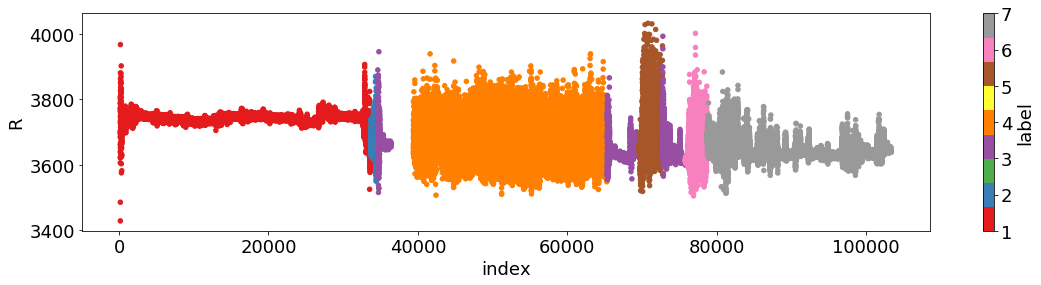

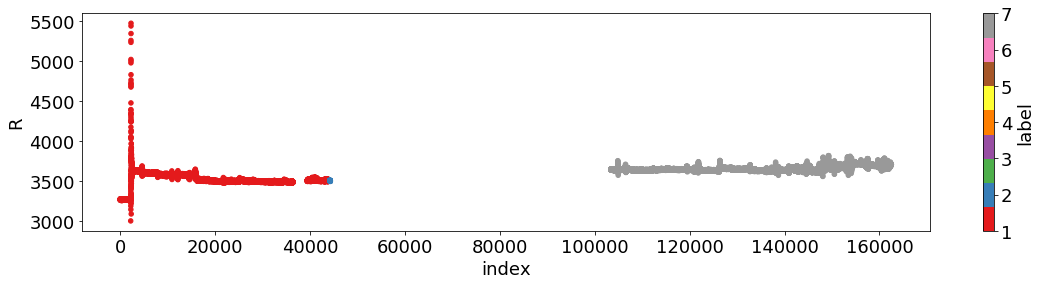

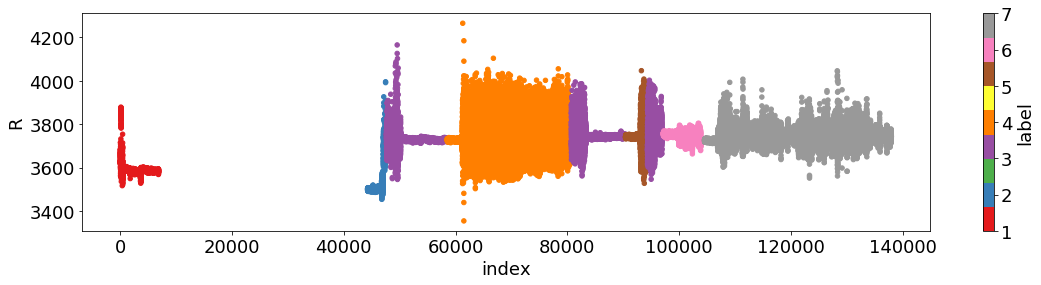

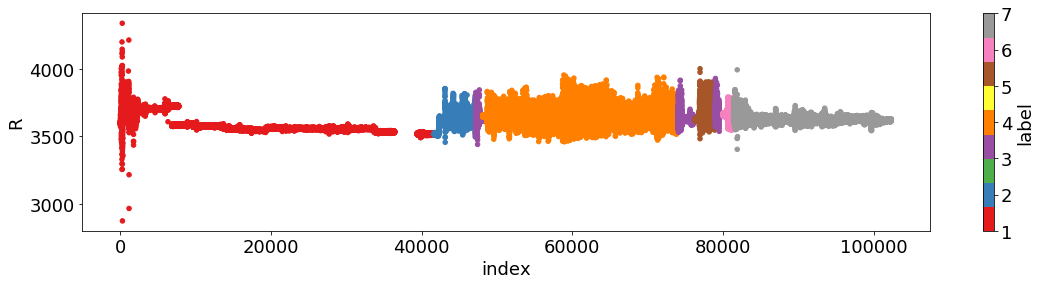

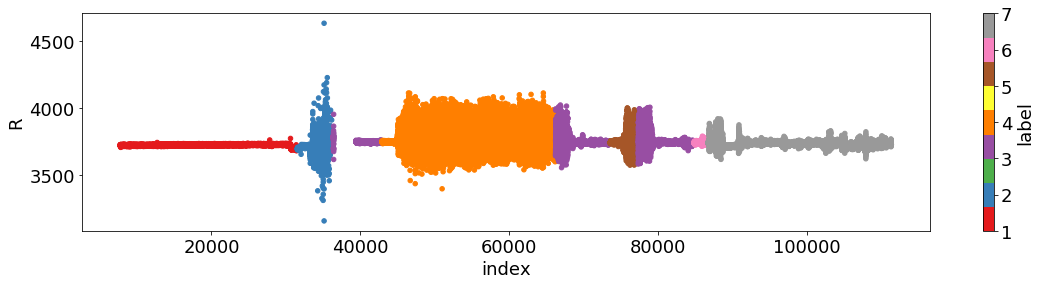

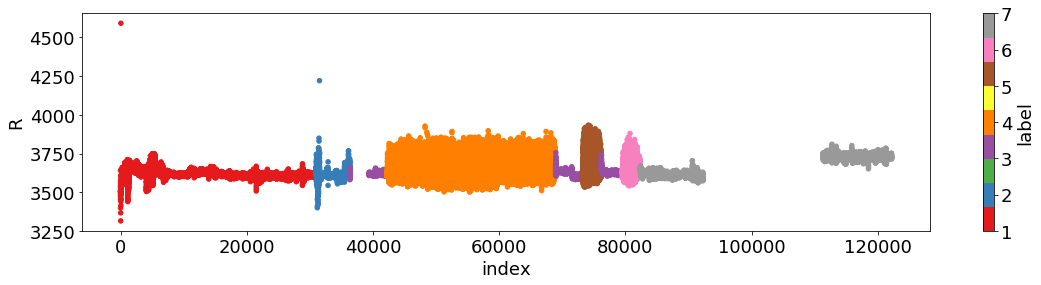

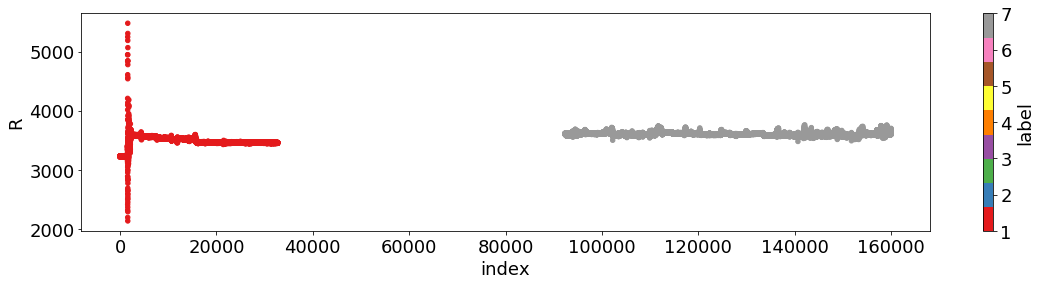

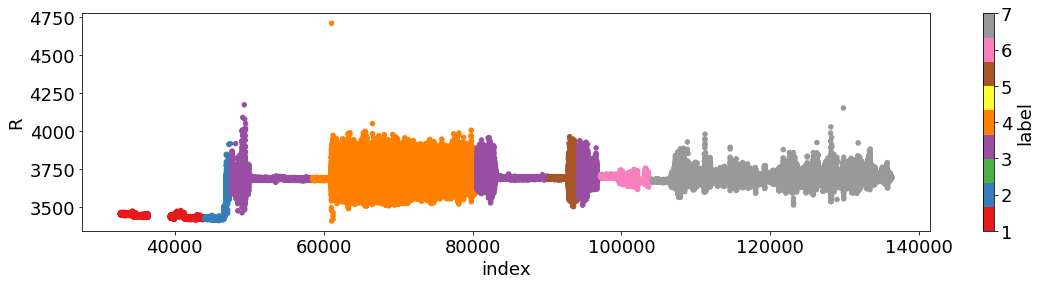

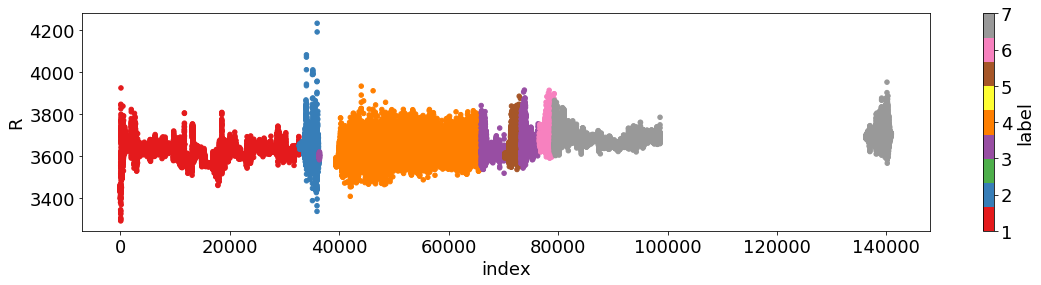

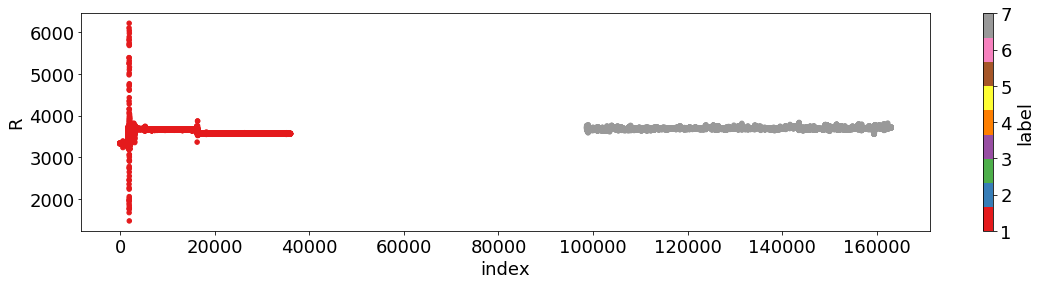

In [15]:
df_features.reset_index(inplace=True)

for i in range(0,10):    
    sub_df = df_features.iloc[i*100000:(i+1)*100000,:]
    fig, ax1 = plt.subplots(figsize=(19,4))
    sub_df.plot.scatter(x='index' ,y='R', c='label', colormap='Set1', ax=ax1)

# Model training (XGBoost)

In [0]:
import xgboost as xgb 
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
df_features = df_features[::13] # % overlap in window sliding # TO DO:

X = df_features.drop(columns=['label', 'index', 'x', 'y', 'z', 'participant']) 
y=  df_features.label

# giving weights to labels to overcome the imbalance issue!
weight_dic = (df_features.label.value_counts().min()/df_features.label.value_counts()).to_dict()
weights = df_features.label.map(weight_dic) 


dtrain=xgb.DMatrix(X,label=y, weight=weights)

In [0]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,
            'objective':'multi:softmax', 'num_class':8,
            'eval_metric':'auc','learning_rate':.05, 
            'max_delta_step':4}

In [18]:
# Training our model 
num_round=50
start_time = time() 
xg=xgb.train(parameters, dtrain, num_round) 

print(f"It takes ~{(time() - start_time)/60:.0f} minutes to train a XGBoost Classifier!")

It takes ~4 minutes to train a XGBoost Classifier!


+----+--------------------+----------------------+
|    | Features           |   feature_importance |
|----+--------------------+----------------------|
|  0 | 75th_percentiles_x |                 1679 |
|  1 | mean_z             |                 1492 |
|  2 | 75th_percentiles_z |                 1448 |
|  3 | 25th_percentiles_x |                 1444 |
|  4 | mean_y             |                 1443 |
|  5 | 25th_percentiles_z |                 1359 |
|  6 | mean_x             |                 1348 |
|  7 | max                |                 1300 |
|  8 | 25th_percentiles_y |                 1229 |
|  9 | min                |                 1225 |
| 10 | std_y              |                 1059 |
| 11 | 75th_percentiles_y |                 1034 |
| 12 | 25th_percentiles   |                 1000 |
| 13 | range_x            |                  884 |
| 14 | std_z              |                  855 |
| 15 | std_x              |                  821 |
| 16 | range_y            |    

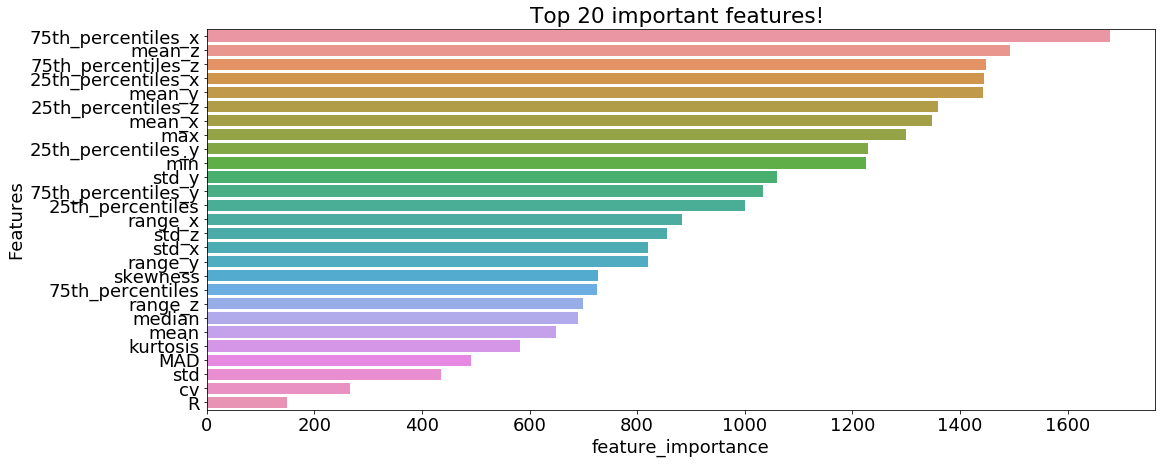

In [19]:
# feature importance!
feature_important = xg.get_score(importance_type="weight")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["feature_importance"]).sort_values(by = "feature_importance", ascending=False)


plt.figure(figsize=(17, 7))
data.reset_index(inplace=True)
data.rename(columns={'index':'Features'}, inplace=True)
sns.barplot(orient='h', y='Features', x='feature_importance', data=data)
_ = plt.title('Top 20 important features! ')

# Top 20 features
print(tabulate(data.head(20), headers='keys', tablefmt='psql'))

# Cross Validation

In [20]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


TRAIN: 24031 TEST: 24027
TRAIN: 48058 TEST: 24027
TRAIN: 72085 TEST: 24027
TRAIN: 96112 TEST: 24027
TRAIN: 120139 TEST: 24027


In [21]:
from sklearn.model_selection import cross_val_score
start_time = time()
results = cross_val_score(xgb.XGBClassifier(max_depth= 7, eta= 1, silent= 1,
                                            objective= 'multi:softmax', num_class= 8,
                                            eval_metric= 'auc', learning_rate= 0.05,
                                            max_delta_step= 4), X, y, cv=tscv)
print(f"It takes ~{(time() - start_time)/60:.0f} minutes to cross validate the XGBoost Classifier!")

It takes ~22 minutes to cross validate the XGBoost Classifier!


# Test

In [0]:
X_t =  pd.read_csv(f"{working_folder}/12.csv", index_col=0, header=None, names=['x', 'y', 'z', 'label'])
#to Do: make it consistent! 
# X_t = X_t.assign(dx=X_t.x.diff(), dy=X_t.y.diff(), dz=X_t.z.diff())
X_t['R'] = np.sqrt(X_t.x**2+X_t.y**2+X_t.z**2)
X_test = feature_extraction(X_t, 156)
X_test = X_test[::13]

y_test = X_test['label']
X_test.drop(columns=['label', 'x', 'y', 'z'], inplace=True)
dtest=xgb.DMatrix(X_test)


y_pred=xg.predict(dtest) 

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(f"The weighted F1-score for this classification is: {f1_score(y_test, y_pred, average='weighted')} ") 
print('-'*70)
print('#'*70)

confusion_matrix(y_pred, y_test)

The weighted F1-score for this classification is: 0.8069250145408625 
----------------------------------------------------------------------
######################################################################


array([[3226,    9,   46,    0,    0,    0,   64],
       [ 301,  317,  260,   35,   16,    7,  280],
       [ 107,    5,  442,   28,    0,    0,  272],
       [   2,    2,   24, 2223,    8,   53,   13],
       [  10,    1,    0,   26,  250,    0,    0],
       [   5,    0,    3,    0,    0,   21,    0],
       [  99,    0,  127,    6,    7,   11,  518]])

## Things to improve:
1- Work more arround the imbalance issue (seems class 2,3, and 6 are not classified correctly for many cases. <br>
2- Better calibraiton of accelerometer data offsetting the gravity and low pass and high pass filtering<br>
3- Data distribution (normal) check with ECDF<br>
4- XGBoost hyperparameter tunning.<br>
5- Transforming Skewed Data:
https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16 <br>
<br>
Van Hees, Vincent T., et al. "Autocalibration of accelerometer data for free-living physical activity assessment using local gravity and temperature: an evaluation on four continents." Journal of Applied Physiology 117.7 (2014): 738-744.
https://www.ncbi.nlm.nih.gov/pubmed/25103964